In [1]:
!pip install git+https://github.com/lagerfeuer/cryptocompare.git

  Cloning https://github.com/lagerfeuer/cryptocompare.git to c:\users\pushkar\appdata\local\temp\pip-req-build-xwnkebyk
  Resolved https://github.com/lagerfeuer/cryptocompare.git to commit 8cc038e5a37026c6af5b1a9bf9d82595b8bc8a46
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone -q https://github.com/lagerfeuer/cryptocompare.git 'C:\Users\Pushkar\AppData\Local\Temp\pip-req-build-xwnkebyk'
You should consider upgrading via the 'c:\users\pushkar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import cryptocompare as cc
import requests
import datetime
import re
# list of coins
coin_list = cc.get_coin_list()
coins = sorted(list(coin_list.keys()))

In [5]:

for i in range(len(coins)):
    if coins[i] == 'USD':
        print(coins[i])
print(coins)

['$ANRX', '$BASED', '$KIRBYRELOADED', '$MAID', '$ROPE', '$TIME', '$TRDL', '$TREAM', '007', '0XBTC', '0xDIARY', '1-UP', '10SET', '1211.CUR', '1337', '1810.CUR', '1COV.CUR', '1CR', '1GOLD', '1INCH', '1INCHDOWN', '1INCHUP', '1IRST', '1SG', '1ST', '1TRC', '1UP', '1WO', '2015', '241.CUR', '2BACCO', '2BASED', '2CRZ', '2GIVE', '2GT', '2KEY', '2LC', '2TF', '300', '300F', '32BIT', '365', '3DES', '3FT', '3XD', '404', '42', '433', '4ART', '522.CUR', '611', '77G', '7E', '808', '888', '88MPH', '8BIT', '8BT', '8PAY', '8X8', '9988.CUR', 'A5T', 'AA.CUR', 'AAA', 'AAB', 'AAC', 'AAP.CUR', 'AAPL', 'AAPL.CUR', 'AAPX', 'AAS', 'AAT', 'AAVE', 'AAVEDOWN', 'AAVEUP', 'ABA', 'ABBC', 'ABBV.CUR', 'ABC', 'ABCC', 'ABELE', 'ABI', 'ABJ', 'ABL', 'ABNB', 'ABS', 'ABT', 'ABX', 'ABXC', 'ABY', 'ABYSS', 'AC', 'AC3', 'ACA', 'ACAT', 'ACB', 'ACC', 'ACCN', 'ACCO', 'ACD', 'ACDC', 'ACE', 'ACES', 'ACH', 'ACHC', 'ACID', 'ACM', 'ACN', 'ACOIN', 'ACP', 'ACT', 'ACTIN', 'ACTN', 'ACU', 'ACXT', 'ADA', 'ADAB', 'ADABEAR', 'ADABULL', 'ADADOWN'

In [6]:
coin_data = {}
for i in range(len(coins)//50 + 1):
    # limited to a list containing at most 300 characters #
    coins_to_get = coins[(50*i):(50*i+50)]
    message = cc.get_price(coins_to_get, currency = 'ETHE', full=True)
    coin_data.update(message['RAW'])

[ERROR] cccagg_or_exchange market does not exist for this coin pair ($ANRX-ETHE), cccagg_or_exchange market does not exist for this coin pair ($BASED-ETHE), cccagg_or_exchange market does not exist for this coin pair ($KIRBYRELOADED-ETHE), cccagg_or_exchange market does not exist for this coin pair ($MAID-ETHE), cccagg_or_exchange market does not exist for this coin pair ($ROPE-ETHE), cccagg_or_exchange market does not exist for this coin pair ($TIME-ETHE), cccagg_or_exchange market does not exist for this coin pair ($TRDL-ETHE), cccagg_or_exchange market does not exist for this coin pair ($TREAM-ETHE), cccagg_or_exchange market does not exist for this coin pair (007-ETHE), cccagg_or_exchange market does not exist for this coin pair (0XBTC-ETHE), cccagg_or_exchange market does not exist for this coin pair (0XDIARY-ETHE), cccagg_or_exchange market does not exist for this coin pair (1-UP-ETHE), cccagg_or_exchange market does not exist for this coin pair (10SET-ETHE), cccagg_or_exchange m

TypeError: 'NoneType' object is not subscriptable

In [12]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [13]:
price('ETH', exchange='Coinbase')

{'USD': 4339.35}

In [14]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [15]:
df = daily_price_historical('ETH', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df1 = df.iloc[1847:]
df

Max length = 4162
Max time = 4160 days 23:00:00


,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.00,0.00,0.00,0.00,0.000000e+00,0.00,direct,,2010-07-16 20:00:00
1,1279411200,0.00,0.00,0.00,0.00,0.000000e+00,0.00,direct,,2010-07-17 20:00:00
2,1279497600,0.00,0.00,0.00,0.00,0.000000e+00,0.00,direct,,2010-07-18 20:00:00
3,1279584000,0.00,0.00,0.00,0.00,0.000000e+00,0.00,direct,,2010-07-19 20:00:00
4,1279670400,0.00,0.00,0.00,0.00,0.000000e+00,0.00,direct,,2010-07-20 20:00:00
...,...,...,...,...,...,...,...,...,...,...
4157,1638489600,4659.62,4088.98,4514.80,520083.09,2.259654e+09,4219.32,direct,,2021-12-02 19:00:00
4158,1638576000,4238.26,3692.26,4219.32,794368.81,3.148500e+09,4124.26,direct,,2021-12-03 19:00:00
4159,1638662400,4255.77,4039.23,4124.26,409297.68,1.701512e+09,4201.09,direct,,2021-12-04 19:00:00
4160,1638748800,4378.45,3921.25,4201.09,620289.44,2.557613e+09,4357.17,direct,,2021-12-05 19:00:00


In [32]:
df1 = df1.reset_index()
df1

,timestamp,index,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,hour,weekday,month,year
0,2015-08-06 20:00:00+00:00,1847,1438905600,27.7900,0.7809,0.7812,53584.56,1.486083e+05,2.7730,multiply,BTC,20.0,3.0,8.0,2015.0
1,2015-08-07 20:00:00+00:00,1848,1438992000,2.5810,0.5958,2.7730,722558.00,5.835435e+05,0.8076,multiply,BTC,20.0,4.0,8.0,2015.0
2,2015-08-08 20:00:00+00:00,1849,1439078400,0.9581,0.6043,0.8076,737119.57,5.475280e+05,0.7428,multiply,BTC,20.0,5.0,8.0,2015.0
3,2015-08-09 20:00:00+00:00,1850,1439164800,0.7628,0.5990,0.7428,585917.04,4.011071e+05,0.6846,multiply,BTC,20.0,6.0,8.0,2015.0
4,2015-08-10 20:00:00+00:00,1851,1439251200,1.1650,0.6548,0.6846,1479695.62,1.567649e+06,1.0590,multiply,BTC,20.0,0.0,8.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,2021-12-02 19:00:00+00:00,4157,1638489600,4659.6200,4088.9800,4514.8000,520083.09,2.259654e+09,4219.3200,direct,,19.0,3.0,12.0,2021.0
2311,2021-12-03 19:00:00+00:00,4158,1638576000,4238.2600,3692.2600,4219.3200,794368.81,3.148500e+09,4124.2600,direct,,19.0,4.0,12.0,2021.0
2312,2021-12-04 19:00:00+00:00,4159,1638662400,4255.7700,4039.2300,4124.2600,409297.68,1.701512e+09,4201.0900,direct,,19.0,5.0,12.0,2021.0
2313,2021-12-05 19:00:00+00:00,4160,1638748800,4378.4500,3921.2500,4201.0900,620289.44,2.557613e+09,4357.1700,direct,,19.0,6.0,12.0,2021.0


In [7]:
df1.to_csv('SMM_ab_bore_ho_raha_hai.csv')

NameError: name 'df1' is not defined

In [30]:
eth = pd.read_csv('ethereum_subreddits.csv')

In [31]:
eth

,Unnamed: 0,created_utc,author,author_fullname,body,subreddit,subreddit_id,send_replies,no_follow,Date,utc,date
0,0,1614141607,ckh27,t2_6ga8asa9,No clue,ethereum,t5_2zf9m,True,True,2021-02-24 04:40:07,1614141607,2021-02-24 04:40:07
1,1,1614141566,Barmelo_Xanthony,t2_xr0uc,Yeah but those interesting and complex things ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:26,1614141566,2021-02-24 04:39:26
2,2,1614141551,Archetypical3,t2_a1rblycq,That makes sense! I’m patient 🤷🏼‍♂️😂,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:11,1614141551,2021-02-24 04:39:11
3,3,1614141539,Hanzburger,t2_wafj0,Probably best to reach out to Ledger to make s...,ethereum,t5_2zf9m,True,True,2021-02-24 04:38:59,1614141539,2021-02-24 04:38:59
4,4,1614141447,ckh27,t2_6ga8asa9,ETH 2 will NOT effect your coins. It is not a ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:37:27,1614141447,2021-02-24 04:37:27
...,...,...,...,...,...,...,...,...,...,...,...,...
131907,131907,1621425493,upsidedownbovine,t2_5qcayets,"Rock, meet bottom…🥺",ethereum,t5_2zf9m,True,False,2021-05-19 11:58:13,1621425493,2021-05-19 11:58:13
131908,131908,1621425415,HellFrozenOVR,t2_4utinbt9,"I see, thanks for the info",ethereum,t5_2zf9m,True,True,2021-05-19 11:56:55,1621425415,2021-05-19 11:56:55
131909,131909,1621425386,Cal_Bingham,t2_a2tf3coy,What’s happening to eth,ethereum,t5_2zf9m,True,True,2021-05-19 11:56:26,1621425386,2021-05-19 11:56:26
131910,131910,1621425376,binary_star_703,t2_80fgg321,"I wouldn't panic, I was a little worried too b...",ethereum,t5_2zf9m,True,False,2021-05-19 11:56:16,1621425376,2021-05-19 11:56:16


In [48]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'], utc=True, infer_datetime_format=True)
df1 = df1.set_index('timestamp')

In [120]:
for i in range(len(df1)):
    pos = df1.index[i]
    hour = pos.hour
    weekday = pos.weekday()
    day = pos.day
    month = pos.month
    year = pos.year
    df1.loc[pos, 'hour'] = hour
    df1.loc[pos, 'weekday'] = weekday
    df1.loc[pos, 'month'] = month
    df1.loc[pos, 'year'] = year
    df1.loc[pos, 'day'] = day

In [121]:
df2 = df1[-338:-157]

In [137]:
df2

,index,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,hour,weekday,month,year,day
timestamp,,,,,,,,,,,,,,,
2021-01-03 19:00:00+00:00,3824,1609718400,1163.36,889.78,978.69,2903509.97,2.941909e+09,1043.16,direct,,19.0,6.0,1.0,2021.0,3.0
2021-01-04 19:00:00+00:00,3825,1609804800,1133.90,975.69,1043.16,2076858.97,2.209100e+09,1103.19,direct,,19.0,0.0,1.0,2021.0,4.0
2021-01-05 19:00:00+00:00,3826,1609891200,1214.12,1059.19,1103.19,2484714.82,2.817165e+09,1210.59,direct,,19.0,1.0,1.0,2021.0,5.0
2021-01-06 19:00:00+00:00,3827,1609977600,1290.46,1151.60,1210.59,1601329.30,1.957429e+09,1225.50,direct,,19.0,2.0,1.0,2021.0,6.0
2021-01-07 19:00:00+00:00,3828,1610064000,1273.69,1067.33,1225.50,1767634.41,2.103291e+09,1216.98,direct,,19.0,3.0,1.0,2021.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28 20:00:00+00:00,4000,1624924800,2245.38,2075.64,2083.80,455104.86,9.904993e+08,2165.61,direct,,20.0,0.0,6.0,2021.0,28.0
2021-06-29 20:00:00+00:00,4001,1625011200,2287.05,2089.55,2165.61,518346.72,1.128165e+09,2276.14,direct,,20.0,1.0,6.0,2021.0,29.0
2021-06-30 20:00:00+00:00,4002,1625097600,2277.05,2074.67,2276.14,499798.16,1.069055e+09,2109.29,direct,,20.0,2.0,6.0,2021.0,30.0


In [138]:
df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['timestamp']).dt.date
df2['time'] = pd.to_datetime(df2['timestamp']).dt.time

In [139]:
df2

,timestamp,index,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,hour,weekday,month,year,day,date
0,2021-01-03 19:00:00+00:00,3824,19:00:00,1163.36,889.78,978.69,2903509.97,2.941909e+09,1043.16,direct,,19.0,6.0,1.0,2021.0,3.0,2021-01-03
1,2021-01-04 19:00:00+00:00,3825,19:00:00,1133.90,975.69,1043.16,2076858.97,2.209100e+09,1103.19,direct,,19.0,0.0,1.0,2021.0,4.0,2021-01-04
2,2021-01-05 19:00:00+00:00,3826,19:00:00,1214.12,1059.19,1103.19,2484714.82,2.817165e+09,1210.59,direct,,19.0,1.0,1.0,2021.0,5.0,2021-01-05
3,2021-01-06 19:00:00+00:00,3827,19:00:00,1290.46,1151.60,1210.59,1601329.30,1.957429e+09,1225.50,direct,,19.0,2.0,1.0,2021.0,6.0,2021-01-06
4,2021-01-07 19:00:00+00:00,3828,19:00:00,1273.69,1067.33,1225.50,1767634.41,2.103291e+09,1216.98,direct,,19.0,3.0,1.0,2021.0,7.0,2021-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2021-06-28 20:00:00+00:00,4000,20:00:00,2245.38,2075.64,2083.80,455104.86,9.904993e+08,2165.61,direct,,20.0,0.0,6.0,2021.0,28.0,2021-06-28
177,2021-06-29 20:00:00+00:00,4001,20:00:00,2287.05,2089.55,2165.61,518346.72,1.128165e+09,2276.14,direct,,20.0,1.0,6.0,2021.0,29.0,2021-06-29
178,2021-06-30 20:00:00+00:00,4002,20:00:00,2277.05,2074.67,2276.14,499798.16,1.069055e+09,2109.29,direct,,20.0,2.0,6.0,2021.0,30.0,2021-06-30
179,2021-07-01 20:00:00+00:00,4003,20:00:00,2159.25,2018.32,2109.29,411011.61,8.555462e+08,2155.65,direct,,20.0,3.0,7.0,2021.0,1.0,2021-07-01


In [39]:
import matplotlib.pyplot as plt

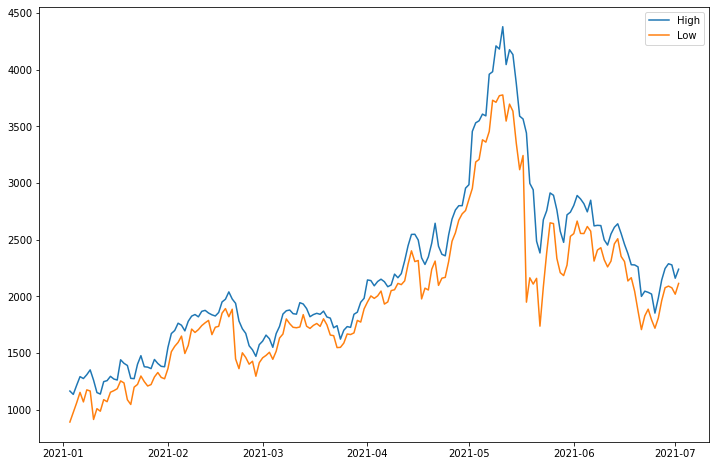

In [142]:
plt.figure(figsize = (12,8))
plt.plot(df2['date'],df2['high'], label = 'High')
plt.plot(df2['date'],df2['low'], label = 'Low')
plt.legend()
plt.show()

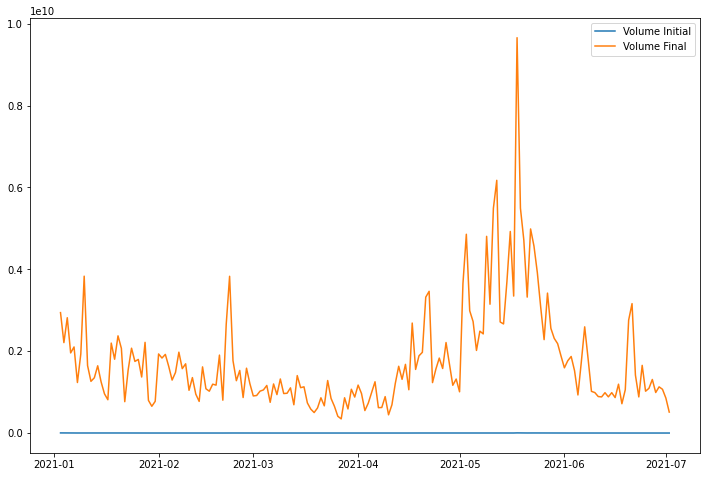

In [141]:
plt.figure(figsize = (12,8))
plt.plot(df2['date'],df2['volumefrom'], label = 'Volume Initial')
plt.plot(df2['date'],df2['volumeto'], label = 'Volume Final')
plt.legend()
plt.show()

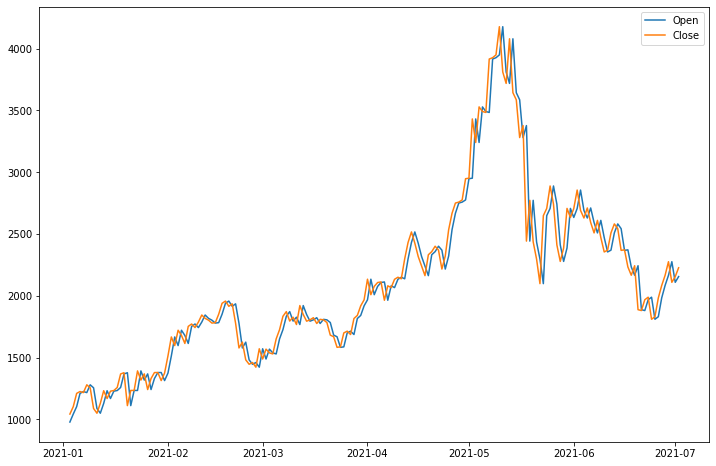

In [143]:
plt.figure(figsize = (12,8))
plt.plot(df2['date'],df2['open'], label = 'Open')
plt.plot(df2['date'],df2['close'], label = 'Close')
plt.legend()
plt.show()

In [56]:
eth['time'] = pd.to_datetime(eth['Date']).dt.time
eth['date'] = pd.to_datetime(eth['Date']).dt.date

In [57]:
eth

,Unnamed: 0,created_utc,author,author_fullname,body,subreddit,subreddit_id,send_replies,no_follow,Date,utc,date,time
0,0,1614141607,ckh27,t2_6ga8asa9,No clue,ethereum,t5_2zf9m,True,True,2021-02-24 04:40:07,1614141607,2021-02-24,04:40:07
1,1,1614141566,Barmelo_Xanthony,t2_xr0uc,Yeah but those interesting and complex things ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:26,1614141566,2021-02-24,04:39:26
2,2,1614141551,Archetypical3,t2_a1rblycq,That makes sense! I’m patient 🤷🏼‍♂️😂,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:11,1614141551,2021-02-24,04:39:11
3,3,1614141539,Hanzburger,t2_wafj0,Probably best to reach out to Ledger to make s...,ethereum,t5_2zf9m,True,True,2021-02-24 04:38:59,1614141539,2021-02-24,04:38:59
4,4,1614141447,ckh27,t2_6ga8asa9,ETH 2 will NOT effect your coins. It is not a ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:37:27,1614141447,2021-02-24,04:37:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131907,131907,1621425493,upsidedownbovine,t2_5qcayets,"Rock, meet bottom…🥺",ethereum,t5_2zf9m,True,False,2021-05-19 11:58:13,1621425493,2021-05-19,11:58:13
131908,131908,1621425415,HellFrozenOVR,t2_4utinbt9,"I see, thanks for the info",ethereum,t5_2zf9m,True,True,2021-05-19 11:56:55,1621425415,2021-05-19,11:56:55
131909,131909,1621425386,Cal_Bingham,t2_a2tf3coy,What’s happening to eth,ethereum,t5_2zf9m,True,True,2021-05-19 11:56:26,1621425386,2021-05-19,11:56:26
131910,131910,1621425376,binary_star_703,t2_80fgg321,"I wouldn't panic, I was a little worried too b...",ethereum,t5_2zf9m,True,False,2021-05-19 11:56:16,1621425376,2021-05-19,11:56:16


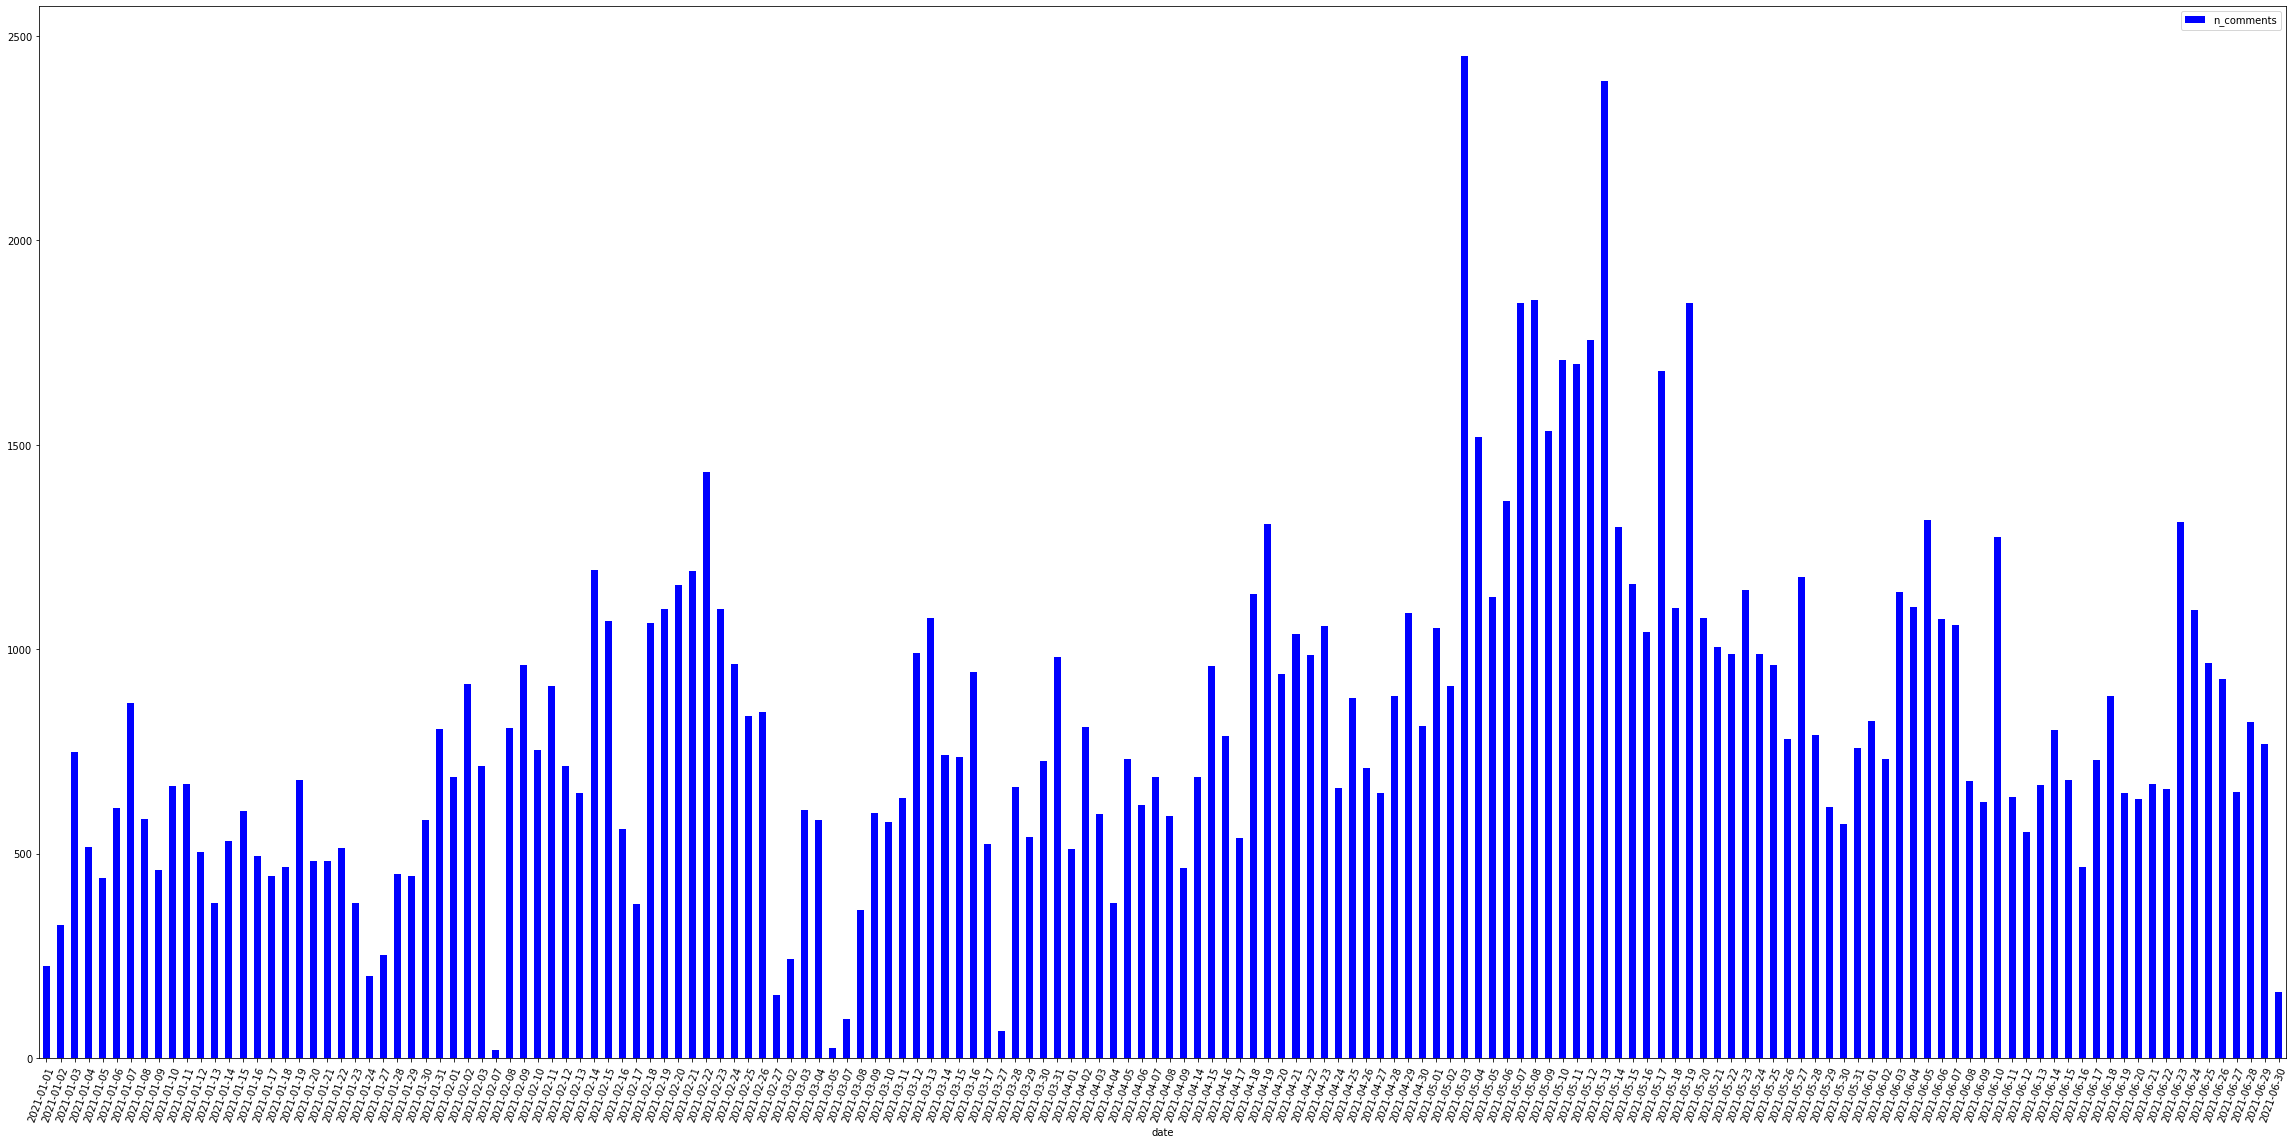

In [59]:
df_sample_grouped = eth.groupby(['date']).size()
n_unique_dates = len(df_sample_grouped.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = df_sample_grouped.plot.bar(x="date", y="n_comments", color='blue')
ax.set_xticklabels(labels=df_sample_grouped.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['n_comments']);

plt.tight_layout()

In [60]:
datetimes = pd.to_datetime(eth['Date'])
eth['month'] = datetimes.dt.month
eth['day'] = datetimes.dt.day
eth

,Unnamed: 0,created_utc,author,author_fullname,body,subreddit,subreddit_id,send_replies,no_follow,Date,utc,date,time,month,day
0,0,1614141607,ckh27,t2_6ga8asa9,No clue,ethereum,t5_2zf9m,True,True,2021-02-24 04:40:07,1614141607,2021-02-24,04:40:07,2,24
1,1,1614141566,Barmelo_Xanthony,t2_xr0uc,Yeah but those interesting and complex things ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:26,1614141566,2021-02-24,04:39:26,2,24
2,2,1614141551,Archetypical3,t2_a1rblycq,That makes sense! I’m patient 🤷🏼‍♂️😂,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:11,1614141551,2021-02-24,04:39:11,2,24
3,3,1614141539,Hanzburger,t2_wafj0,Probably best to reach out to Ledger to make s...,ethereum,t5_2zf9m,True,True,2021-02-24 04:38:59,1614141539,2021-02-24,04:38:59,2,24
4,4,1614141447,ckh27,t2_6ga8asa9,ETH 2 will NOT effect your coins. It is not a ...,ethereum,t5_2zf9m,True,True,2021-02-24 04:37:27,1614141447,2021-02-24,04:37:27,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131907,131907,1621425493,upsidedownbovine,t2_5qcayets,"Rock, meet bottom…🥺",ethereum,t5_2zf9m,True,False,2021-05-19 11:58:13,1621425493,2021-05-19,11:58:13,5,19
131908,131908,1621425415,HellFrozenOVR,t2_4utinbt9,"I see, thanks for the info",ethereum,t5_2zf9m,True,True,2021-05-19 11:56:55,1621425415,2021-05-19,11:56:55,5,19
131909,131909,1621425386,Cal_Bingham,t2_a2tf3coy,What’s happening to eth,ethereum,t5_2zf9m,True,True,2021-05-19 11:56:26,1621425386,2021-05-19,11:56:26,5,19
131910,131910,1621425376,binary_star_703,t2_80fgg321,"I wouldn't panic, I was a little worried too b...",ethereum,t5_2zf9m,True,False,2021-05-19 11:56:16,1621425376,2021-05-19,11:56:16,5,19


In [61]:
m =  eth.groupby(['author', 'day']).size().reset_index(name='count')

In [62]:
m

,author,day,count
0,--Slipp3ry__Snak3--,4,1
1,--Slipp3ry__Snak3--,23,2
2,--_-_o_-_--,17,3
3,--_-_o_-_--,18,4
4,--_l,3,1
...,...,...,...
64217,zzcool,17,1
64218,zzeleznez,13,1
64219,zzgzzpop,19,1
64220,zzseayzz,7,1


In [63]:
x = m.loc[m["count"] > 1]
x

,author,day,count
1,--Slipp3ry__Snak3--,23,2
2,--_-_o_-_--,17,3
3,--_-_o_-_--,18,4
9,-Aerobrake-,14,5
10,-Aerobrake-,15,3
...,...,...,...
64191,zutrasimlo,28,3
64201,zxbc,21,2
64211,zz3dd,26,3
64213,zzaloesanisvera,23,2


In [64]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

<BarContainer object of 19208 artists>

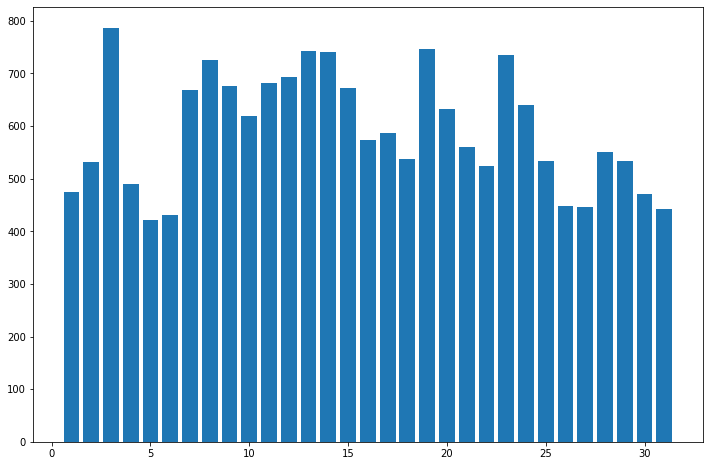

In [65]:
plt.figure(figsize = (12,8))
plt.bar('day', 'count', data = x)

In [66]:
eth['body'] = eth['body'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [67]:
eth['body'] = eth['body'].apply(lambda x: str(x).lower())

In [68]:
stop_words = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                  'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'all', 'just',
                  'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to',
                  'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him',
                  'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are',
                  'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 'be', 'we', 'who',
                  'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 'or', 'own', 'into', 'yourself', 'down',
                  'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more',
                  'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will',
              'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have',
                  'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most',
                  'such', 'why', 'off', 'yours', 'so', 'the', 'having', 'once', 'jobs', 'job', 'amp', 'im','like','character','characters','movie','hes','thats','dont','time','point']

In [69]:
eth['body'] = eth['body'].apply(lambda x: ' '.join([t for t in x.split() if t not in stop_words]))

In [70]:
eth['body'] = eth['body'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [71]:
eth = eth[eth['body']!='removed']

In [72]:
eth = eth.reset_index()

In [73]:
eth

,index,Unnamed: 0,created_utc,author,author_fullname,body,subreddit,subreddit_id,send_replies,no_follow,Date,utc,date,time,month,day
0,0,0,1614141607,ckh27,t2_6ga8asa9,clue,ethereum,t5_2zf9m,True,True,2021-02-24 04:40:07,1614141607,2021-02-24,04:40:07,2,24
1,1,1,1614141566,Barmelo_Xanthony,t2_xr0uc,yeah interesting complex things useful smart c...,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:26,1614141566,2021-02-24,04:39:26,2,24
2,2,2,1614141551,Archetypical3,t2_a1rblycq,makes sense im patient,ethereum,t5_2zf9m,True,True,2021-02-24 04:39:11,1614141551,2021-02-24,04:39:11,2,24
3,3,3,1614141539,Hanzburger,t2_wafj0,probably best reach ledger make sure its bug t...,ethereum,t5_2zf9m,True,True,2021-02-24 04:38:59,1614141539,2021-02-24,04:38:59,2,24
4,4,4,1614141447,ckh27,t2_6ga8asa9,eth effect coins fork upgrade takes long its d...,ethereum,t5_2zf9m,True,True,2021-02-24 04:37:27,1614141447,2021-02-24,04:37:27,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115923,131907,131907,1621425493,upsidedownbovine,t2_5qcayets,rock meet bottom,ethereum,t5_2zf9m,True,False,2021-05-19 11:58:13,1621425493,2021-05-19,11:58:13,5,19
115924,131908,131908,1621425415,HellFrozenOVR,t2_4utinbt9,see thanks info,ethereum,t5_2zf9m,True,True,2021-05-19 11:56:55,1621425415,2021-05-19,11:56:55,5,19
115925,131909,131909,1621425386,Cal_Bingham,t2_a2tf3coy,whats happening eth,ethereum,t5_2zf9m,True,True,2021-05-19 11:56:26,1621425386,2021-05-19,11:56:26,5,19
115926,131910,131910,1621425376,binary_star_703,t2_80fgg321,wouldnt panic little worried sunk money sale,ethereum,t5_2zf9m,True,False,2021-05-19 11:56:16,1621425376,2021-05-19,11:56:16,5,19


In [74]:
body = []
try:
    for i in range(len(eth)):
        body.append(eth['body'][i])
except KeyError as err:
    print(err)

In [ ]:
body

In [75]:
listToBody = ' '.join([str(elem) for elem in body])

In [76]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(listToBody)

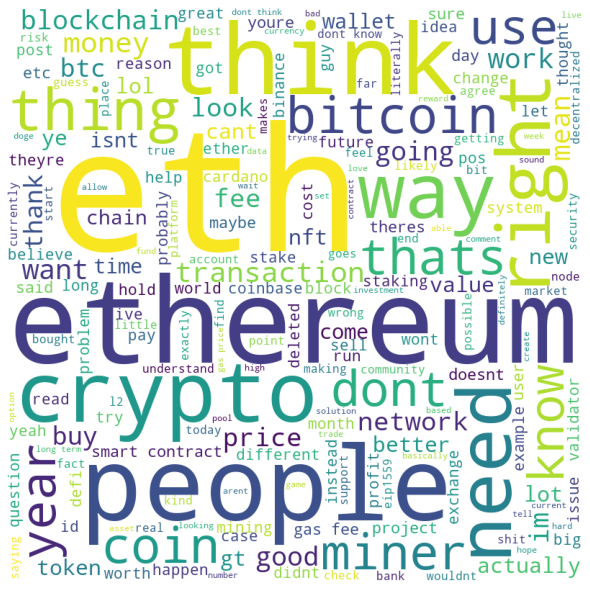

In [77]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
crypto = pd.read_csv('crypto.csv')

In [ ]:
crypto = crypto[crypto['body']!= '[deleted]']

In [ ]:
crypto.reset_index()
crypto['body']

In [ ]:
crypto['body'] = crypto['body'].astype('str')

In [ ]:
crypto['body'] = crypto['body'].apply(lambda x: str(x).lower())

In [ ]:
crypto['body'] = crypto['body'].apply(lambda x: ' '.join([t for t in x.split() if t not in stop_words]))

In [ ]:
crypto['body'] = crypto['body'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [127]:
eth_feb = []
try:
    for i in range(len(eth)):
        if eth['month'][i] == 3:
            eth_feb.append(eth['day'][i])
except KeyError as err:
    print(err)


In [131]:
eth_march = {'Day':eth_feb}
eth_march = pd.DataFrame(eth_march)

In [134]:
eth_march['Day'].unique()

array([14, 31,  5,  4, 13, 17,  9, 15,  2, 11, 16, 29, 12, 10,  8,  7,  3,
       30, 28, 27], dtype=int64)

In [98]:
author = []
day = []
try:
    for i in range(len(eth)):
        if eth['month'][i] == 2:
            author.append(eth['author'][i])
            day.append(eth['day'][i])
except KeyError as err:
    print(err)

In [99]:
len(author)

17481

In [100]:
feb_data = {'Author':author, 'Day':day}

In [102]:
feb_data = pd.DataFrame(feb_data)

In [105]:
feb_data = feb_data.groupby(['Author', 'Day']).size().reset_index(name='count')

In [106]:
feb_data

,Author,Day,count
0,-1z-,22,1
1,-Aerobrake-,22,1
2,-CryptoMania,20,2
3,-MeatMissile-,9,2
4,-Zeleios-,22,1
...,...,...,...
9983,zvive,18,1
9984,zxbc,21,2
9985,zz3dd,25,1
9986,zz3dd,26,3


<BarContainer object of 9988 artists>

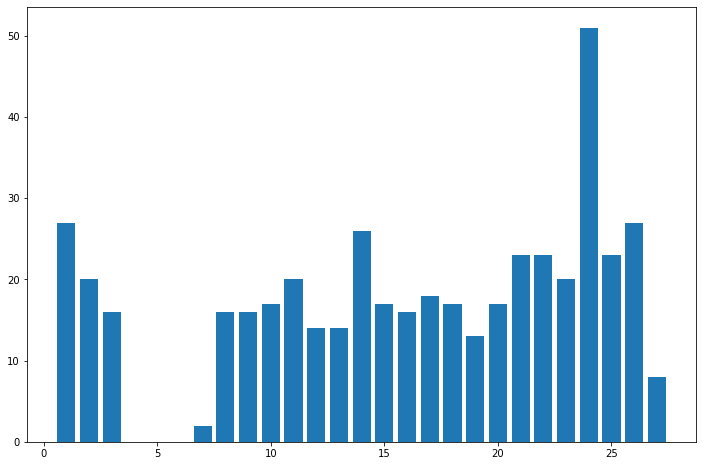

In [108]:
plt.figure(figsize = (12,8))
plt.bar('Day', 'count', data = feb_data)

In [123]:
feb_prices = df2[29:57]

In [124]:
feb_prices

,index,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,hour,weekday,month,year,day
timestamp,,,,,,,,,,,,,,,
2021-02-01 19:00:00+00:00,3853,1612224000,1549.20,1361.84,1374.57,1325932.08,1.932069e+09,1513.90,direct,,19.0,0.0,2.0,2021.0,1.0
2021-02-02 19:00:00+00:00,3854,1612310400,1670.87,1510.16,1513.90,1156693.15,1.832160e+09,1667.22,direct,,19.0,1.0,2.0,2021.0,2.0
2021-02-03 19:00:00+00:00,3855,1612396800,1697.97,1558.06,1667.22,1172256.64,1.921214e+09,1597.44,direct,,19.0,2.0,2.0,2021.0,3.0
2021-02-04 19:00:00+00:00,3856,1612483200,1762.23,1592.92,1597.44,963997.03,1.626954e+09,1721.48,direct,,19.0,3.0,2.0,2021.0,4.0
2021-02-05 19:00:00+00:00,3857,1612569600,1744.33,1648.46,1721.48,765790.73,1.293997e+09,1679.14,direct,,19.0,4.0,2.0,2021.0,5.0
2021-02-06 19:00:00+00:00,3858,1612656000,1694.50,1494.84,1679.14,929611.92,1.480130e+09,1614.64,direct,,19.0,5.0,2.0,2021.0,6.0
2021-02-07 19:00:00+00:00,3859,1612742400,1779.25,1565.98,1614.64,1166827.02,1.975322e+09,1752.87,direct,,19.0,6.0,2.0,2021.0,7.0
2021-02-08 19:00:00+00:00,3860,1612828800,1824.66,1710.46,1752.87,894749.11,1.573102e+09,1772.05,direct,,19.0,0.0,2.0,2021.0,8.0
2021-02-09 19:00:00+00:00,3861,1612915200,1838.93,1680.58,1772.05,959891.91,1.691442e+09,1743.00,direct,,19.0,1.0,2.0,2021.0,9.0


ValueError: x and y must have same first dimension, but have shapes (1,) and (28,)

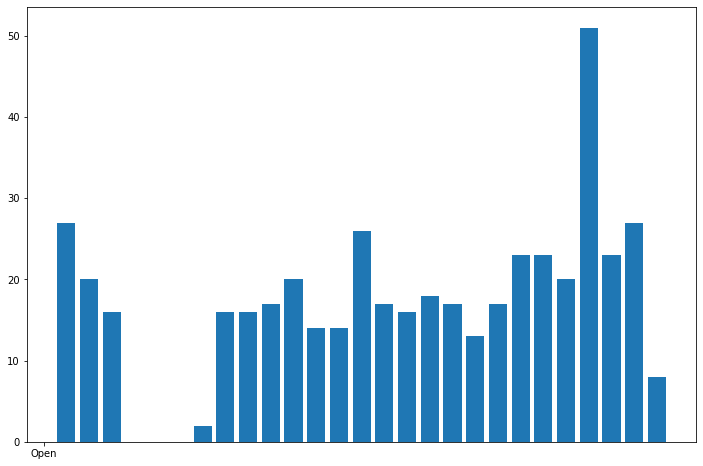

In [125]:
plt.figure(figsize = (12,8))
plt.bar('Day', 'count', data = feb_data)
plt.plot('Open', 'weekday', data = feb_prices)